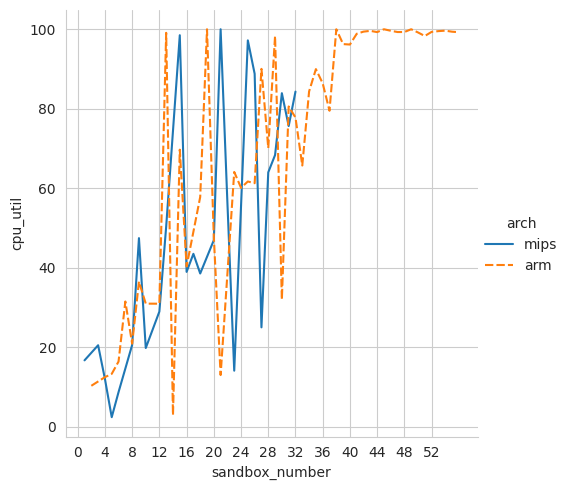

In [6]:
# initial analysis of top output
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('mips/top_data_mips.csv')
df1['cpu_util'] = df1['cpu_sys'] + df1['cpu_us']
df1['mem_util'] = (df1['mem_total'] - df1['mem_free']) /df1['mem_total']
df1['swap_util'] = (df1['swap_total'] - df1['swap_free']) /df1['swap_total']
df1['arch'] = 'mips'

df2 = pd.read_csv('arm/top_data_arm.csv')
df2['cpu_util'] = df2['cpu_sys'] + df2['cpu_us']
df2['mem_util'] = (df2['mem_total'] - df2['mem_free']) /df2['mem_total']
df2['swap_util'] = (df2['swap_total'] - df2['swap_free']) /df2['swap_total']
df2['arch'] = 'arm'

df3 =  pd.concat([df1, df2])

sns.set_style('whitegrid')
p = sns.relplot(data=df3.query('sandbox_number > 0'), x="sandbox_number", y="cpu_util", hue='arch', style='arch', kind="line",errorbar=None)
#p.set_axis_labels('Number of bots', 'Average CPU utili bandwidth (KiB/s)')
ax = p.axes[0, 0]
ax.set_xticks([0, 4, 8, 12, 16, 20,24,28,32,36,40,44,48,52])
#plt.savefig('scalability.pdf', format='pdf')


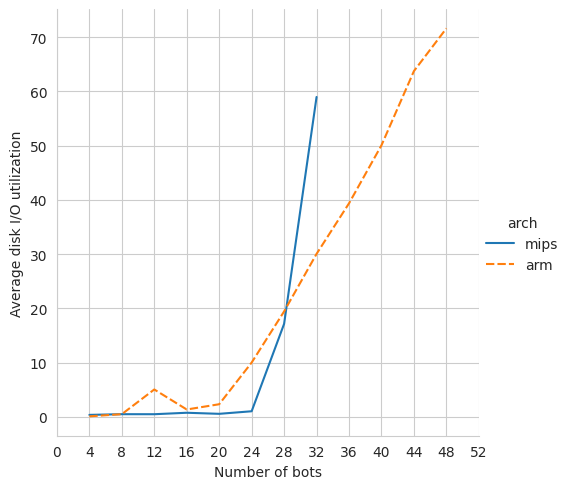

In [13]:
# filter records based on observing time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

m1 = 'mips/merged_metrics.csv'
m2 = 'arm/merged_metrics.csv'

time_ranges1 = [
('2024-07-30 10:43:00','2024-07-30 10:46:00', 4),
('2024-07-30 10:50:00','2024-07-30 10:53:00',8),
('2024-07-30 10:57:00','2024-07-30 11:00:00',12),
('2024-07-30 11:05:00','2024-07-30 11:08:00',16),
('2024-07-30 11:14:00','2024-07-30 11:17:00',20),
('2024-07-30 11:22:00','2024-07-30 11:25:00',24),
('2024-07-30 11:33:00','2024-07-30 11:36:00',28),
('2024-07-30 11:49:00','2024-07-30 11:52:00',32)
]

time_ranges2 = [
('2024-07-30 13:46:00','2024-07-30 13:48:00',4),
('2024-07-30 13:51:00','2024-07-30 13:54:00',8),
('2024-07-30 13:55:00','2024-07-30 13:57:00',12),
('2024-07-30 13:57:00','2024-07-30 14:00:00',16),
('2024-07-30 14:00:00','2024-07-30 14:03:00',20),
('2024-07-30 14:06:00','2024-07-30 14:08:00',24),
('2024-07-30 14:11:00','2024-07-30 14:14:00',28),
('2024-07-30 14:16:00','2024-07-30 14:19:00',32),
('2024-07-30 14:21:00','2024-07-30 14:24:00',36),
('2024-07-30 14:25:00','2024-07-30 14:48:00',40),
('2024-07-30 14:25:00','2024-07-30 14:48:00',44),
('2024-07-30 14:25:00','2024-07-30 14:48:00',48)
]
        
df1 = pd.read_csv(m1)
df1['time'] = pd.to_datetime(df1['time'])
df1['cpu_util'] = df1['cpu_sys'] + df1['cpu_us']
df1['mem_util'] = (df1['mem_total'] - df1['mem_free']) /df1['mem_total']
df1['swap_util'] = (df1['swap_total'] - df1['swap_free']) /df1['swap_total']
df1['arch'] = 'mips'
mask1 = pd.Series([False] * len(df1))
for start_time, end_time, n in time_ranges1:
    mask1 = mask1 | ((df1['time'] >= start_time) & (df1['time'] <= end_time) & (df1['sandbox_number']==n))
filtered_df1 = df1[mask1]

df2 = pd.read_csv(m2)
df2['time'] = pd.to_datetime(df2['time'])
df2['cpu_util'] = df2['cpu_sys'] + df2['cpu_us']
df2['mem_util'] = (df2['mem_total'] - df2['mem_free']) /df2['mem_total']
df2['swap_util'] = (df2['swap_total'] - df2['swap_free']) /df2['swap_total']
df2['arch'] = 'arm'
mask2 = pd.Series([False] * len(df2))
for start_time, end_time, n in time_ranges2:
    mask2 = mask2 | ((df2['time'] >= start_time) & (df2['time'] <= end_time) & (df2['sandbox_number']==n))
filtered_df2 = df2[mask2]

df3 =  pd.concat([filtered_df1, filtered_df2])

sns.set_style('whitegrid')
p = sns.relplot(data=df3, x="sandbox_number", y="load_avg_1m", hue='arch', style='arch', kind="line",errorbar=None)
p.set_axis_labels('Number of bots', 'Average disk I/O utilization')
ax = p.axes[0, 0]
ax.set_xticks([0, 4, 8, 12, 16, 20,24,28,32,36,40,44,48,52])
plt.savefig('load_average.pdf', format='pdf',bbox_inches='tight', pad_inches=0)


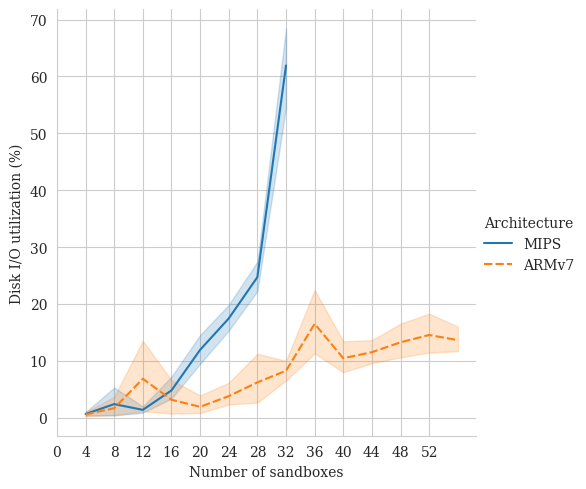

In [22]:
# analysis with average value on specified scales
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

m1 = 'mips/merged_metrics.csv'
m2 = 'arm/merged_metrics.csv'

num_range1 = [4,8,12,16,20,24,28,32]
num_range2 = [4,8,12,16,20,24,28,32,36,40,44,48,52,56]

#num_range1 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
#num_range2 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56]
        
df1 = pd.read_csv(m1)
df1['time'] = pd.to_datetime(df1['time'])
df1['cpu_util'] = df1['cpu_sys'] + df1['cpu_us']
df1['mem_util'] = (df1['mem_total'] - df1['mem_free']) /df1['mem_total']
df1['swap_util'] = (df1['swap_total'] - df1['swap_free']) /df1['swap_total']
df1['Architecture'] = 'MIPS'
mask1 = pd.Series([False] * len(df1))
for n in num_range1:
    mask1 = mask1 | ((df1['sandbox_number']==n))
filtered_df1 = df1[mask1]

df2 = pd.read_csv(m2)
df2['time'] = pd.to_datetime(df2['time'])
df2['cpu_util'] = df2['cpu_sys'] + df2['cpu_us']
df2['mem_util'] = (df2['mem_total'] - df2['mem_free']) /df2['mem_total']
df2['swap_util'] = (df2['swap_total'] - df2['swap_free']) /df2['swap_total']
df2['Architecture'] = 'ARMv7'
mask2 = pd.Series([False] * len(df2))
for n in num_range2:
    mask2 = mask2 | ((df2['sandbox_number']==n))
filtered_df2 = df2[mask2]

df3 =  pd.concat([filtered_df1, filtered_df2])

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'serif'
p = sns.relplot(data=df3, x="sandbox_number", y="io_util", hue='Architecture', style='Architecture', kind="line")
p.set_axis_labels('Number of sandboxes', 'Disk I/O utilization (%)')
ax = p.axes[0, 0]
ax.set_xticks([0, 4, 8, 12, 16, 20,24,28,32,36,40,44,48,52])
plt.savefig('io_util.pdf', format='pdf',bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_906646/3902777881.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.rename(columns={'swap_util': 'mem_util'}, inplace=True)
/tmp/ipykernel_906646/3902777881.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['type'] = 'Mem'
/tmp/ipykernel_906646/3902777881.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

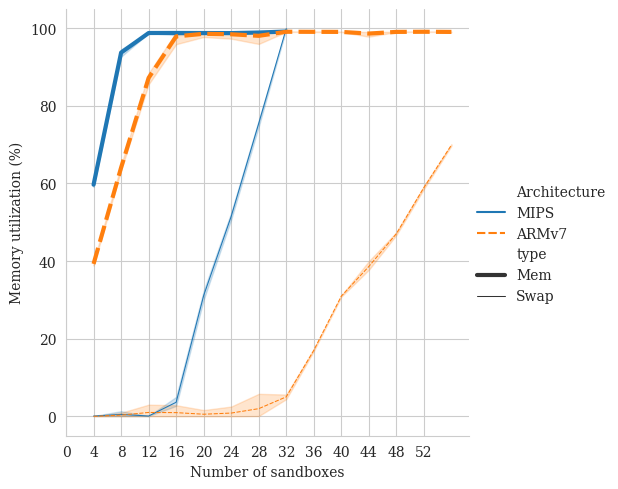

In [20]:
# analysis with average value on specified scales: combining memory util and swap util
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

m1 = 'mips/merged_metrics.csv'
m2 = 'arm/merged_metrics.csv'

num_range1 = [4,8,12,16,20,24,28,32]
num_range2 = [4,8,12,16,20,24,28,32,36,40,44,48,52,56]
        
df1 = pd.read_csv(m1)
df1['time'] = pd.to_datetime(df1['time'])
df1['mem_util'] = 100 * (df1['mem_total'] - df1['mem_free']) /df1['mem_total']
df1['swap_util'] = 100 * (df1['swap_total'] - df1['swap_free']) /df1['swap_total']
df1['Architecture'] = 'MIPS'
df10 = df1[['time','mem_util','Architecture','sandbox_number']]
df11 = df1[['time','swap_util','Architecture','sandbox_number']]
df11.rename(columns={'swap_util': 'mem_util'}, inplace=True)
df10['type'] = 'Mem'
df11['type'] = 'Swap'
cdf1 = pd.concat([df10, df11], ignore_index=True)

mask1 = pd.Series([False] * len(cdf1))
for n in num_range1:
    mask1 = mask1 | ((cdf1['sandbox_number']==n))
filtered_df1 = cdf1[mask1]

df2 = pd.read_csv(m2)
df2['time'] = pd.to_datetime(df2['time'])
df2['mem_util'] = 100 * (df2['mem_total'] - df2['mem_free']) /df2['mem_total']
df2['swap_util'] = 100 * (df2['swap_total'] - df2['swap_free']) /df2['swap_total']
df2['Architecture'] = 'ARMv7'
df20 = df2[['time','mem_util','Architecture','sandbox_number']]
df21 = df2[['time','swap_util','Architecture','sandbox_number']]
df21.rename(columns={'swap_util': 'mem_util'}, inplace=True)
df20['type'] = 'Mem'
df21['type'] = 'Swap'
cdf2 = pd.concat([df20, df21], ignore_index=True)

mask2 = pd.Series([False] * len(cdf2))
for n in num_range2:
    mask2 = mask2 | ((cdf2['sandbox_number']==n))
filtered_df2 = cdf2[mask2]

df3 =  pd.concat([filtered_df1, filtered_df2])

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'serif'
p = sns.relplot(data=df3, x="sandbox_number", y="mem_util", hue='Architecture', style='Architecture', size='type', kind="line")
p.set_axis_labels('Number of sandboxes', 'Memory utilization (%)')
ax = p.axes[0, 0]
ax.set_xticks([0, 4, 8, 12, 16, 20,24,28,32,36,40,44,48,52])
plt.savefig('mem_util.pdf', format='pdf',bbox_inches='tight', pad_inches=0)

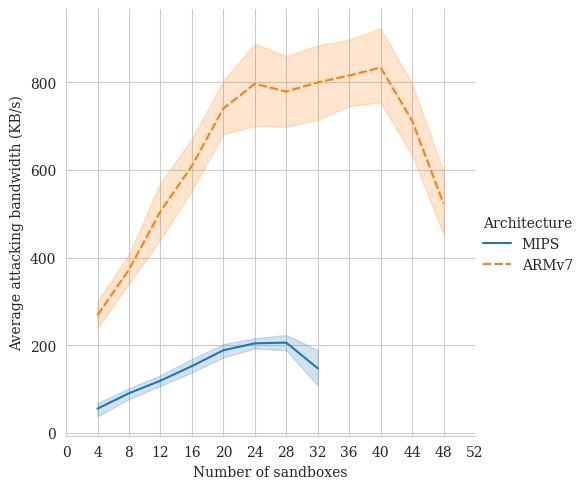

In [11]:
# scalability test via analysis of attacking power
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

tp1 = 'mips/network_throughput.csv'
tp2 = 'arm/network_throughput.csv'

def convert_bandwidth(value):
    if 'MiB/s' in value:
        return float(value.replace(' MiB/s', '')) * 1024
    if 'KiB/s' in value:
        return float(value.replace(' KiB/s', ''))
    elif 'B/s' in value:
        return float(value.replace(' B/s', '')) / 1024
    else:
        return float('nan')

time_ranges1 = [
('2024-07-30 10:43:00','2024-07-30 10:46:00', 4),
('2024-07-30 10:50:00','2024-07-30 10:53:00', 8),
('2024-07-30 10:57:00','2024-07-30 11:00:00', 12),
('2024-07-30 11:05:00','2024-07-30 11:08:00', 16),
('2024-07-30 11:14:00','2024-07-30 11:17:00', 20),
('2024-07-30 11:22:00','2024-07-30 11:25:00', 24),
('2024-07-30 11:33:00','2024-07-30 11:36:00', 28),
('2024-07-30 11:49:00','2024-07-30 11:52:00', 32),
]

time_ranges2 = [
('2024-07-30 13:46:00','2024-07-30 13:48:00', 4),
('2024-07-30 13:51:00','2024-07-30 13:54:00', 8),
('2024-07-30 13:55:00','2024-07-30 13:57:00', 12),
('2024-07-30 13:57:00','2024-07-30 14:00:00', 16),
('2024-07-30 14:00:00','2024-07-30 14:03:00', 20),
('2024-07-30 14:06:00','2024-07-30 14:08:00', 24),
('2024-07-30 14:11:00','2024-07-30 14:14:00', 28),
('2024-07-30 14:16:00','2024-07-30 14:19:00', 32),
('2024-07-30 14:21:00','2024-07-30 14:24:00', 36),
('2024-07-30 14:26:00','2024-07-30 14:29:00', 40),
('2024-07-30 14:31:00','2024-07-30 14:34:00', 44),
('2024-07-30 14:45:00','2024-07-30 14:48:00', 48),
]

def get_num_of_bots(time, tr):
    for s,e,n in tr:
        ts = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
        te = datetime.strptime(e, '%Y-%m-%d %H:%M:%S')
        if time >= ts and time <= te:
            return n
    return 0
        
df1 = pd.read_csv(tp1)
df1 = df1.dropna(subset=['virbr1'])
df1['time'] = pd.to_datetime(df1['time'])
df1['bandwidth'] = df1['virbr1'].apply(convert_bandwidth)
df1['bot_number'] = df1['time'].apply(get_num_of_bots, args=(time_ranges1,))
df1['Architecture'] = 'MIPS'

df2 = pd.read_csv(tp2)
df2 = df2.dropna(subset=['virbr1'])
df2['time'] = pd.to_datetime(df2['time'])
df2['bandwidth'] = df2['virbr1'].apply(convert_bandwidth)
df2['bot_number'] = df2['time'].apply(get_num_of_bots, args=(time_ranges2,))
df2['Architecture'] = 'ARMv7'

#init_bw = df[df['bot_num'] == 4]['bandwidth'].mean()
#df1 = df.query("bot_num > 0 and bot_num < 33")
#df1['tag'] = 'test'
#df2 = df.query("bot_num > 0 and bot_num < 33")
#df2['tag'] = 'theory'
#df2['bandwidth'] = init_bw * (df2['bot_num']/4)
df3 =  pd.concat([df1, df2])

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'serif'
p = sns.relplot(data=df3.query('bot_number > 0'), x="bot_number", y="bandwidth", hue='Architecture', style='Architecture', kind="line")
p.set_axis_labels('Number of sandboxes', 'Average attacking bandwidth (KB/s)')
ax = p.axes[0, 0]
ax.set_xticks([0, 4, 8, 12, 16, 20,24,28,32,36,40,44,48,52])
plt.savefig('scalability.pdf', format='pdf',bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_21334/872088690.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tag'] = 'test'
/tmp/ipykernel_21334/872088690.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tag'] = 'theory'
/tmp/ipykernel_21334/872088690.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

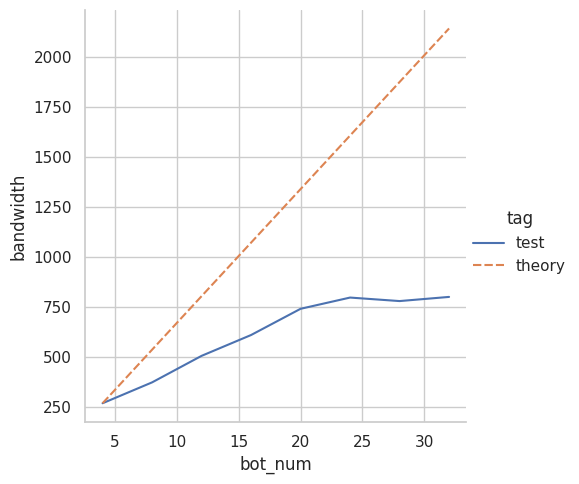

In [100]:
# deprecated: scalability test via analysis of attacking power, with ideal profile
tp = 'arm/network_throughput.csv'

def convert_bandwidth(value):
    if 'MiB/s' in value:
        return float(value.replace(' MiB/s', '')) * 1024
    if 'KiB/s' in value:
        return float(value.replace(' KiB/s', ''))
    elif 'B/s' in value:
        return float(value.replace(' B/s', '')) / 1024
    else:
        return float('nan')

time_ranges = [
('2024-07-30 13:46:00','2024-07-30 13:48:00', 4),
('2024-07-30 13:51:00','2024-07-30 13:54:00', 8),
('2024-07-30 13:55:00','2024-07-30 13:57:00', 12),
('2024-07-30 13:57:00','2024-07-30 14:00:00', 16),
('2024-07-30 14:00:00','2024-07-30 14:03:00', 20),
('2024-07-30 14:06:00','2024-07-30 14:08:00', 24),
('2024-07-30 14:11:00','2024-07-30 14:14:00', 28),
('2024-07-30 14:16:00','2024-07-30 14:19:00', 32),
('2024-07-30 14:21:00','2024-07-30 14:24:00', 36),
('2024-07-30 14:26:00','2024-07-30 14:29:00', 40),
('2024-07-30 14:31:00','2024-07-30 14:34:00', 44),
('2024-07-30 14:45:00','2024-07-30 14:48:00', 48),
]

def get_num_of_bots(time):
    for s,e,n in time_ranges:
        ts = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
        te = datetime.strptime(e, '%Y-%m-%d %H:%M:%S')
        if time >= ts and time <= te:
            return n
    return 0
        
df = pd.read_csv(tp)
df = df.dropna(subset=['virbr1'])
df['time'] = pd.to_datetime(df['time'])
df['bandwidth'] = df['virbr1'].apply(convert_bandwidth)
df['bot_num'] = df['time'].apply(get_num_of_bots)
init_bw = df[df['bot_num'] == 4]['bandwidth'].mean()

df1 = df.query("bot_num > 0 and bot_num < 33")
df1['tag'] = 'test'
df2 = df.query("bot_num > 0 and bot_num < 33")
df2['tag'] = 'theory'
df2['bandwidth'] = init_bw * (df2['bot_num']/4)
df3 =  pd.concat([df1, df2])

sns.set_style('whitegrid')
sns.relplot(data=df3, x="bot_num", y="bandwidth", hue='tag', style='tag', kind="line",errorbar=None)

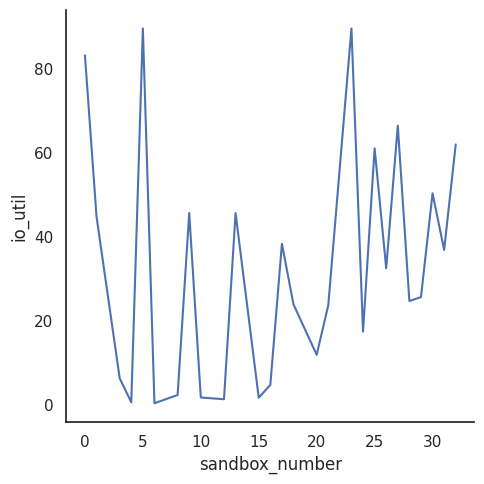

In [190]:
# merge iostats and top output for mips
import pygwalker as pyg

df1 = pd.read_csv('mips/top_data_mips.csv')
df2 = pd.read_csv('mips/disk_util.csv')

def convert_percentage(value):
    if '%' in value:
        return float(value.replace('%', ''))
    else:
        return float('nan')

fixed_date = '2024-07-30 ' 

df1['time'] = pd.to_datetime(fixed_date + df1['time'])
df2['time'] = pd.to_datetime(df2['time'])
#df2['time_bak'] = df2['time']
df2['io_util'] = df2['nvme0n1'].apply(convert_percentage)
merged_df = pd.merge_asof(df1, df2, on='time', direction='nearest')
merged_df.to_csv('mips/merged_metrics.csv')

#walker = pyg.walk(merged_df, kernel_computation=True)

sns.set_style('white')
sns.relplot(data=merged_df, x="sandbox_number", y="io_util", kind="line",errorbar=None)

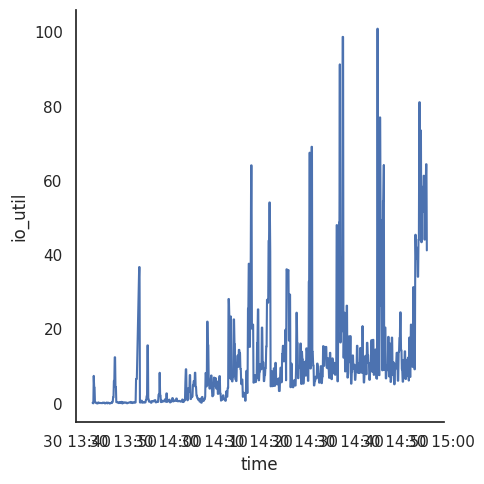

In [271]:
# merge iostats and top output for arm
import pygwalker as pyg

df1 = pd.read_csv('arm/top_data_arm.csv')
df2 = pd.read_csv('arm/disk_util.csv')

def convert_percentage(value):
    if '%' in value:
        return float(value.replace('%', ''))
    else:
        return float('nan')

fixed_date = '2024-07-30 ' 

df1['time'] = pd.to_datetime(fixed_date + df1['time'])
df2['time'] = pd.to_datetime(df2['time'])
df2['time_bak'] = df2['time']
df2['io_util'] = df2['nvme0n1'].apply(convert_percentage)
merged_df = pd.merge_asof(df1, df2, on='time', direction='nearest')
merged_df.to_csv('arm/merged_metrics.csv')

#walker = pyg.walk(merged_df, kernel_computation=True)

sns.set_style('white')
sns.relplot(data=merged_df, x="time", y="io_util", kind="line",errorbar=None)

/tmp/ipykernel_906646/3823864546.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10.rename(columns={'sandbox_cpu': 'cpu_util'}, inplace=True)
/tmp/ipykernel_906646/3823864546.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10.rename(columns={'sandbox_mem': 'mem_util'}, inplace=True)
/tmp/ipykernel_906646/3823864546.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


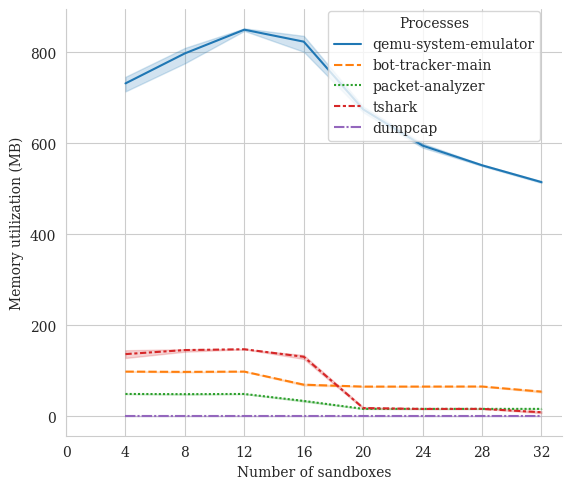

In [76]:
# analysis for honeypot processes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

m1 = 'mips/merged_metrics.csv'
m2 = 'arm/merged_metrics.csv'

num_range1 = [4,8,12,16,20,24,28,32]
num_range2 = [4, 8, 12, 16, 20,24,28,32,36,40,44,48,52]
#num_range1 = [1,3,6,9,12,15,18,21,24,27,30,32]
#num_range2 = [1,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57]
        
df1 = pd.read_csv(m1)
df1['time'] = pd.to_datetime(df1['time'])
df1['Architecture'] = 'MIPS'
df1.rename(columns={'tool_analzyer_cpu': 'tool_analyzer_cpu'}, inplace=True)

df10 = df1[['time','sandbox_cpu','sandbox_mem','Architecture','sandbox_number']]
df11 = df1[['time','tool_main_cpu','tool_main_mem','Architecture','sandbox_number']]
df12 = df1[['time','tool_analyzer_cpu','tool_analyzer_mem','Architecture','sandbox_number']]
df13 = df1[['time','tshark_cpu','tshark_mem','Architecture','sandbox_number']]
df14 = df1[['time','dumpcap_cpu','dumpcap_mem','Architecture','sandbox_number']]

df10.rename(columns={'sandbox_cpu': 'cpu_util'}, inplace=True)
df10.rename(columns={'sandbox_mem': 'mem_util'}, inplace=True)
df10['process']='qemu-system-emulator'
df11.rename(columns={'tool_main_cpu': 'cpu_util'}, inplace=True)
df11.rename(columns={'tool_main_mem': 'mem_util'}, inplace=True)
df11['process']='bot-tracker-main'
df12.rename(columns={'tool_analyzer_cpu': 'cpu_util'}, inplace=True)
df12.rename(columns={'tool_analyzer_mem': 'mem_util'}, inplace=True)
df12['process']='packet-analyzer'
df13.rename(columns={'tshark_cpu': 'cpu_util'}, inplace=True)
df13.rename(columns={'tshark_mem': 'mem_util'}, inplace=True)
df13['process']='tshark'
df14.rename(columns={'dumpcap_cpu': 'cpu_util'}, inplace=True)
df14.rename(columns={'dumpcap_mem': 'mem_util'}, inplace=True)
df14['process']='dumpcap'

cdf1 = pd.concat([df10, df11, df12, df13, df14], ignore_index=True)

mask1 = pd.Series([False] * len(cdf1))
for n in num_range1:
    mask1 = mask1 | ((cdf1['sandbox_number']==n))
filtered_df1 = cdf1[mask1]

df2 = pd.read_csv(m2)
df2['time'] = pd.to_datetime(df2['time'])
df2['Architecture'] = 'ARMv7'
df2.rename(columns={'tool_analzyer_cpu': 'tool_analyzer_cpu'}, inplace=True)

df20 = df2[['time','sandbox_cpu','sandbox_mem','Architecture','sandbox_number']]
df21 = df2[['time','tool_main_cpu','tool_main_mem','Architecture','sandbox_number']]
df22 = df2[['time','tool_analyzer_cpu','tool_analyzer_mem','Architecture','sandbox_number']]
df23 = df2[['time','tshark_cpu','tshark_mem','Architecture','sandbox_number']]
df24 = df2[['time','dumpcap_cpu','dumpcap_mem','Architecture','sandbox_number']]

df20.rename(columns={'sandbox_cpu': 'cpu_util'}, inplace=True)
df20.rename(columns={'sandbox_mem': 'mem_util'}, inplace=True)
df20['process']='qemu-system-emulator'
df21.rename(columns={'tool_main_cpu': 'cpu_util'}, inplace=True)
df21.rename(columns={'tool_main_mem': 'mem_util'}, inplace=True)
df21['process']='bot-tracker-main'
df22.rename(columns={'tool_analyzer_cpu': 'cpu_util'}, inplace=True)
df22.rename(columns={'tool_analyzer_mem': 'mem_util'}, inplace=True)
df22['process']='packet-analyzer'
df23.rename(columns={'tshark_cpu': 'cpu_util'}, inplace=True)
df23.rename(columns={'tshark_mem': 'mem_util'}, inplace=True)
df23['process']='tshark'
df24.rename(columns={'dumpcap_cpu': 'cpu_util'}, inplace=True)
df24.rename(columns={'dumpcap_mem': 'mem_util'}, inplace=True)
df24['process']='dumpcap'

cdf2 = pd.concat([df20, df21, df22, df23, df24], ignore_index=True)

mask2 = pd.Series([False] * len(cdf2))
for n in num_range2:
    mask2 = mask2 | ((cdf2['sandbox_number']==n))
filtered_df2 = cdf2[mask2]

df3 =  pd.concat([filtered_df1, filtered_df2])
df3['mem_util'] = 16*1024*df3['mem_util']/100

df3.rename(columns={'process':'Processes'}, inplace=True)

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'serif'
p = sns.relplot(data=df3.query('Architecture == "MIPS"'), x="sandbox_number", y="mem_util", hue='Processes', style='Processes', kind="line", aspect=1.2)
p.set_axis_labels('Number of sandboxes', 'Memory utilization (MB)')
ax = p.axes[0, 0]
ax.set_xticks([0, 4, 8, 12, 16, 20,24,28,32])
#ax.set_xticks([0, 4, 8, 12, 16, 20,24,28,32,36,40,44,48,52])
#if ax.get_legend() is not None:
#    ax.get_legend().remove()
sns.move_legend(p, "upper right", bbox_to_anchor=(0.71, 0.98), frameon=True)

plt.savefig('process_mem_util_mips.pdf', format='pdf',bbox_inches='tight', pad_inches=0)